In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from osprey.actions.post_reader import postreader_averaged 
from osprey.graphics.hovmoller import hovmoller

In [23]:
data = postreader_averaged(expname='lfr0', startyear=1990, endyear=2059, varlabel='thetao', diagname='hovmoller', replace=False, metric='diff')

2024-09-09 13:12:04,274 - INFO - File to be loaded /perm/itas/ece4/lfr0/nemo/hovmoller_thetao_diff_1990-2059.nc
2024-09-09 13:12:04,417 - INFO - Averaged data found.


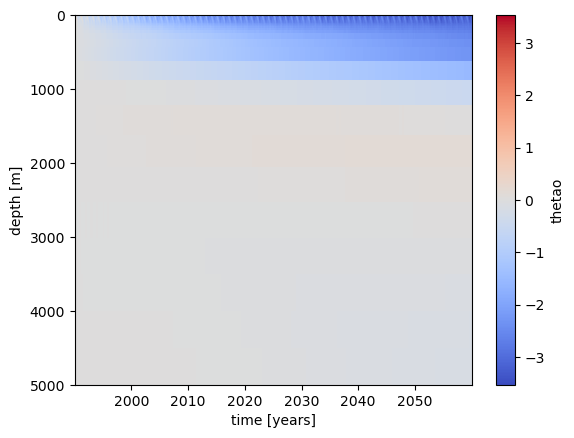

In [26]:
delta = (data['thetao']-data['thetao'].isel(time=0)) 
delta.plot(x='time', y='z', cmap=plt.cm.coolwarm)
plt.ylim(0,5000)
plt.gca().invert_yaxis() 

In [3]:
gdata = postreader_averaged(expname='FE01', startyear=1990, endyear=2059, varlabel='thetao', diagname='hovmoller', replace=False, metric='rdiff')

2024-09-09 13:30:43,226 - INFO - File to be loaded /perm/itas/ece4/FE01/nemo/hovmoller_thetao_rdiff_1990-2059.nc
2024-09-09 13:30:43,384 - INFO - Averaged data not found. Creating new file ...
2024-09-09 13:30:43,388 - INFO - Files to be loaded ['/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1990-1990.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1991-1991.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1992-1992.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1993-1993.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1994-1994.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1995-1995.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1996-1996.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1997-1997.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1998-1998.nc', '/ec/res4/scratch/itas/ece4/FE01/output/nemo/FE01_oce_1m_T_1999-1999.nc', '/ec/res4/scra

ValueError: conflicting sizes for dimension 'time': length 31 on the data but length 840 on coordinate 'time'

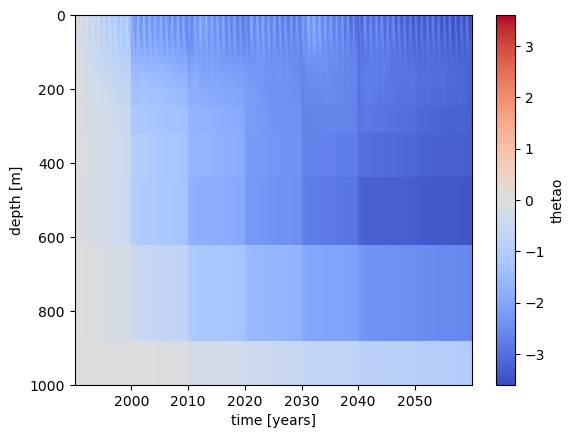

In [29]:
delta = (gdata['thetao']-gdata['thetao'].isel(time=0)) 
delta.plot(x='time', y='z', cmap=plt.cm.coolwarm)
plt.ylim(0,5000)
plt.gca().invert_yaxis() 

In [ ]:
hovmoller(expname='lfr0', startyear=2049, endyear=2059, varlabel='thetao', reader='post', replace=False, metric='diff')